# Вебинар 2. Предобработка данных.

**План занятия**
* [Data Science проект](#ds)
* [1. Загрузка данных](#load)
* [2. Приведение типов данных](#types)
    * [Обзор количественных переменных](#numeric)
    * [Обзор номинативных переменных](#cats)
* [Статистика](#stats)
* [3. Обработка пропусков](#nan)
* [4. Обработка выбросов](#outlier)
* [5. Отбор и построение новых признаков](#feature)
    * [Категориальные переменные](#category)
        * [A) Бинарные (дамми) переменные](#dummy)
        * [Б) Feature encoding](#feature_encoding)
    * [Вещественные переменные](#numeric_feature)
        * [A) Feature discretization](#feature_discretization)
        * [Б) Feature binarization](#feature_binarization)
* [6. Сохранение результатов](#save)
* [7. Подготовка данных в реальном проекте](#real)

### **Data Science проект:**<a class='anchor' id='ds'>
1. Постановка задачи
2. Получение данных
_________
3. **Анализ данных**
4. Визуализация данных
5. **Предобработка данных**
6. **Генерация новых признаков**
7. Построение модели
8. Оценка качества
______
9. Внедрение модели
10. Мониторинг качества и улучшение модели

Пример DataFrame для тестирования функции в ДЗ:

In [ ]:
data = pd.DataFrame(
            [[820, '2021-04-29', 1, 213],[100, '2021-04-29', 1, 213],
             [600, '2021-04-30', 2, 113],[700, '2021-05-01', 3, 893]],
            columns=['cost', 'date', 'sale_id', 'shop_id']
        )

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Пути к директориям и файлам**

In [3]:
DATASET_PATH = '/content/drive/My Drive/GB/Python_libs/3. Вебинар 1 Numpy Pandas/housing.csv'
PREPARED_DATASET_PATH = '/content/drive/My Drive/GB/Python_libs/3. Вебинар 1 Numpy Pandas/housing_prepared.csv'

### 1. Загрузка данных <a class='anchor' id='load'>

**Описание задачи**

Цель - предсказать стоимость дома 

Зачем?  

_В банках, страховых компаниях:_
- Узнать истинную стоимость имущества (залога)
- Принять решение о выдаче ипотеки/страховки
- Принять решение о % по ипотеке/страховке
  
_На площадках объявлений (Авито, Циан, ...):_
- Найти недооцененные квартиры (~ выгодные предложения), показать их пользователям
- Показывать рыночную стоимость квартиры пользователям
- Для тех, кто продает квартиру, рекомендовать цену продажи

_Для инвесторов в недвижимость:_
- Определять рыночную стоимость квартир
- Поиск недооцененных активов
- Торговля на рынке недвижимости

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

Считываем данные. По строкам - наблюдения, по столбцам - признаки.

In [5]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [6]:
df.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,20639


In [7]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
14104,-117.1,32.75,20.0,2355.0,722.0,1848.0,576.0,2.0036,99200.0,NEAR OCEAN,14104


С помощью .sample можно получить случайную долю объектов, либо перемешать весь датасет

In [8]:
df.sample(frac=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
10462,-117.64,33.48,12.0,2007.0,397.0,1033.0,373.0,5.6754,275900.0,<1H OCEAN,10462
187,-122.23,37.79,30.0,999.0,264.0,1011.0,263.0,1.8854,137500.0,NEAR BAY,187
5702,-118.25,34.23,NaN,1954.0,368.0,967.0,370.0,5.0862,261300.0,<1H OCEAN,5702
5992,-117.71,34.08,26.0,2744.0,494.0,1411.0,465.0,4.2639,154200.0,INLAND,5992
769,-122.09,37.65,35.0,1184.0,200.0,572.0,194.0,4.7143,193800.0,NEAR BAY,769
...,...,...,...,...,...,...,...,...,...,...,...
6188,-117.92,34.10,35.0,2994.0,603.0,NaN,561.0,4.0052,160700.0,<1H OCEAN,6188
20389,-118.90,34.19,26.0,1582.0,196.0,573.0,182.0,10.0595,500001.0,<1H OCEAN,20389
19132,-122.70,38.23,47.0,2090.0,387.0,1053.0,377.0,3.5673,310300.0,<1H OCEAN,19132
7368,-118.21,33.97,43.0,1751.0,400.0,1558.0,379.0,3.0313,166100.0,<1H OCEAN,7368


In [9]:
df.shape

(20640, 11)

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id'],
      dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=20640, step=1)

Получение одного или нескольких признаков из датасета

In [22]:
df['total_rooms']

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [23]:
df['total_rooms'].values

array([ 880., 7099., 1467., ..., 2254., 1860., 2785.])

In [15]:
df.total_rooms 

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [20]:
df[ ['total_rooms', 'total_bedrooms'] ]

,total_rooms,total_bedrooms
0,880.0,129.0
1,7099.0,1106.0
2,1467.0,190.0
3,1274.0,235.0
4,1627.0,280.0
...,...,...
20635,1665.0,374.0
20636,697.0,150.0
20637,2254.0,485.0
20638,1860.0,409.0


Фильтрация данных с помощью булевых масок

In [ ]:
df['population'] > 400

0        False
1         True
2         True
3         True
4         True
         ...  
20635     True
20636    False
20637    False
20638     True
20639     True
Name: population, Length: 20640, dtype: bool

In [25]:
df[ df['population'] > 400 ].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5


In [26]:
df[ (df['population'] > 100) & (df['households'] > 100) ].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [27]:
df[(df['population'] > 100) | (df['households'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [28]:
~(df['population'].isnull())

0         True
1         True
2         True
3         True
4         True
         ...  
20635     True
20636     True
20637    False
20638     True
20639     True
Name: population, Length: 20640, dtype: bool

In [29]:
df[df['population'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
129,-122.20,37.84,30.0,2211.0,346.0,NaN,343.0,6.0666,311500.0,NEAR BAY,129
140,-122.18,37.81,30.0,292.0,38.0,NaN,52.0,6.3624,483300.0,NEAR BAY,140
167,-122.25,37.80,29.0,2468.0,864.0,NaN,773.0,1.3929,193800.0,NEAR BAY,167
194,-122.25,37.79,52.0,902.0,237.0,NaN,227.0,3.6250,125000.0,NEAR BAY,194
...,...,...,...,...,...,...,...,...,...,...,...
20489,-118.68,34.27,16.0,4637.0,941.0,NaN,878.0,4.0568,225200.0,<1H OCEAN,20489
20571,-121.99,38.53,6.0,4598.0,834.0,NaN,812.0,3.4186,127300.0,INLAND,20571
20624,-121.41,39.04,16.0,1698.0,300.0,NaN,291.0,3.0739,87200.0,INLAND,20624
20633,-121.53,39.19,27.0,2080.0,412.0,NaN,382.0,2.5495,98300.0,INLAND,20633


In [31]:
df[~(df['population'].isnull())]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
...,...,...,...,...,...,...,...,...,...,...,...
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND,20634
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638


In [ ]:
len(df[~(df['population'].isnull())]) == len(df) - len(df[df['population'].isnull()])

True

In [32]:
df[~(df['population'] > 400)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,13
25,-122.28,37.85,NaN,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25
29,-122.28,37.84,52.0,729.0,160.0,395.0,155.0,1.6875,132000.0,NEAR BAY,29
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
...,...,...,...,...,...,...,...,...,...,...,...
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,20625
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND,20627
20633,-121.53,39.19,27.0,2080.0,412.0,NaN,382.0,2.5495,98300.0,INLAND,20633
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636


In [33]:
df[(df['population'] > 400)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5
...,...,...,...,...,...,...,...,...,...,...,...
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,20632
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND,20634
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638


In [34]:
len(df)-len(df[~(df['population'] > 400)])==len(df[(df['population'] > 400)])

True

In [35]:
tmp = df[~(df['population'] > 100)]
tmp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [36]:
tmp.index

Int64Index([   34,    59,    61,    73,   121,   129,   140,   167,   194,
              201,
            ...
            20452, 20453, 20484, 20489, 20502, 20571, 20624, 20625, 20633,
            20637],
           dtype='int64', length=828)

Взятие наблюдения по индексу

In [37]:
tmp.loc[34]

longitude              -122.27
latitude                 37.83
housing_median_age          51
total_rooms               2665
total_bedrooms             574
population                 NaN
households                 536
median_income           2.7303
median_house_value      109700
ocean_proximity       NEAR BAY
id                          34
Name: 34, dtype: object

In [46]:
df.loc[34]

longitude              -122.27
latitude                 37.83
housing_median_age          51
total_rooms               2665
total_bedrooms             574
population                 NaN
households                 536
median_income           2.7303
median_house_value      109700
ocean_proximity       NEAR BAY
id                          34
Name: 34, dtype: object

In [ ]:
tmp.iloc[0]

longitude              -122.27
latitude                 37.83
housing_median_age          51
total_rooms               2665
total_bedrooms             574
population                 NaN
households                 536
median_income           2.7303
median_house_value      109700
ocean_proximity       NEAR BAY
id                          34
Name: 34, dtype: object

In [39]:
df.iloc[0]

longitude              -122.23
latitude                 37.88
housing_median_age          41
total_rooms                880
total_bedrooms             129
population                 322
households                 126
median_income           8.3252
median_house_value      452600
ocean_proximity       NEAR BAY
id                           0
Name: 0, dtype: object

In [40]:
tmp.loc[:61]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61


In [43]:
tmp.iloc[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61


In [44]:
tmp.iloc[-6:-1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN,20502
20571,-121.99,38.53,6.0,4598.0,834.0,NaN,812.0,3.4186,127300.0,INLAND,20571
20624,-121.41,39.04,16.0,1698.0,300.0,NaN,291.0,3.0739,87200.0,INLAND,20624
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,20625
20633,-121.53,39.19,27.0,2080.0,412.0,NaN,382.0,2.5495,98300.0,INLAND,20633


Сводная таблица

In [47]:
pd.pivot_table(data=df,
               values='total_rooms',
               index='ocean_proximity',
               columns='housing_median_age',
               aggfunc='mean')

housing_median_age,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0
ocean_proximity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-,NaN,NaN,NaN,NaN,NaN,NaN,1659.000000,NaN,NaN,NaN,4134.500000,5382.000000,NaN,5549.000000,4061.000000,NaN,127.000000,2127.000000,1733.000000,NaN,NaN,NaN,NaN,NaN,1785.000000,2723.000000,NaN,1080.000000,NaN,NaN,987.000000,NaN,879.000000,1066.500000,1249.000000,NaN,NaN,NaN,1186.000000,NaN,NaN,NaN,NaN,1934.000000,NaN,NaN,NaN,NaN,1141.000000,NaN,NaN,NaN
<1H OCEAN,NaN,6401.789474,4422.000000,6364.053333,5290.195122,4895.355932,6394.565217,4433.000000,3518.205882,3539.333333,4075.746835,4296.807692,3582.269231,3746.460993,3403.575581,3313.063218,3352.389706,3361.531100,3270.702830,3492.040268,3554.126437,3369.759036,3148.314136,3263.330396,3030.805147,2802.943709,2697.432692,2628.638498,2530.871287,2311.658879,2407.665158,2303.318008,2201.796667,2064.860724,1913.162584,1792.464516,1744.659176,1752.040000,1694.953216,1754.359477,1581.297297,1616.035176,1664.389222,1682.994413,1676.606897,1829.878505,1716.526882,1811.365854,1852.320755,1838.890909,1755.384615,1694.745283
INLAND,1101.25,5609.533333,7826.806452,6194.164384,5110.294118,4365.310811,4938.484848,3915.522936,3979.943925,3545.041096,3880.984733,3968.279661,3594.660000,3485.341584,3069.685106,2614.018182,3109.129825,2854.611814,2741.795918,2503.539604,2589.366460,2738.429630,2479.993056,2415.631206,2372.933333,2280.011976,2280.493243,2306.527778,2157.315789,2221.950704,2018.238532,2171.373494,2049.356725,1915.319277,2005.263473,1686.582857,1708.522523,1730.134615,1874.365854,1703.830769,1634.421875,1629.676056,1515.840000,1756.453125,1564.139535,1616.830189,1767.794118,1618.945946,2045.533333,1627.818182,1891.916667,1509.414201
ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1675.000000,NaN,716.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1827.333333
NEAR BAY,NaN,712.000000,6623.000000,4549.750000,5140.533333,3219.285714,9565.500000,4166.571429,3413.750000,3447.473684,3214.400000,5508.888889,4401.750000,5775.812500,4326.043478,2774.268293,2919.064516,3436.562500,3357.392857,3413.470588,4196.760000,4648.318182,3640.424242,3247.888889,3238.000000,2559.636364,3507.973684,3094.941176,2938.366667,2467.526316,2925.900000,2523.304348,2358.115385,2509.153846,2180.272727,2005.419355,2158.094595,1894.063830,2045.000000,1790.888889,1889.294118,2216.150000,2038.586957,1991.456522,2086.377358,1879.571429,1885.585366,1839.694444,1796.976744,1851.621622,1923.733333,2082.142623
NEAR OCEAN,NaN,3626.500000,6032.000000,6647.840000,3082.526316,4707.200000,5294.470588,3073.555556,4097.826087,3425.500000,3839.933333,3734.250000,3434.360000,2780.102564,3361.253731,2868.350000,2861.922078,2933.147059,3194.600000,2518.723077,2780.626866,3718.350000,2734.871429,2737.803279,2707.756757,2631.170732,2333.157895,2313.393939,2890.688525,2629.486111,2172.732394,2441.348485,2602.835616,2717.250000,2109.028571,2169.108911,1918.855072,2304.062500,2442.950820,2018.216216,1704.083333,1881.447368,1892.844828,1815.714286,1863.288889,1723.250000,1760.583333,1630.117647,1932.941176,1879.263158,1942.833333,1643.606299


In [50]:
df[ (df.housing_median_age == 3)  & (df.ocean_proximity == 'INLAND') ]['total_rooms'].mean()

7826.806451612903

### 2. Приведение типов данных<a class='anchor' id='types'>

In [51]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
id                      int64
dtype: object

In [52]:
type(df.longitude)

pandas.core.series.Series

In [53]:
type(df.longitude.values[0])

numpy.float64

In [54]:
df['id'].dtype

dtype('int64')

In [55]:
df['id'].values

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [56]:
type(df['id'].values)

numpy.ndarray

In [58]:
df['ocean_proximity'].nunique()

6

In [59]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', '-', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [60]:
df['id'] = df['id'].astype(str)
df['id'].dtype

dtype('O')

In [ ]:
# у нас нет времени, но вот каст к типу время
#data['time'] = pd.to_datetime(data.time)

In [61]:
type(df.id[0])

str

### Обзор количественных переменных<a class='anchor' id='numeric'>
    
*Количественные (непрерывные) переменные*  - это переменные, которые могут принимать любые числовые значения в некотором диапазоне.

In [62]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


С помощью .describe можно получить первичное понимание того, что из себя представляют данные

In [66]:
df_num_features.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  19918 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20041 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.7+ MB


### Статистика<a class='anchor' id='stats'>

In [68]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

**Среднее арифметическое**

In [69]:
mean = a.sum() / len(a)
mean

3.0

**Дисперсия и стандартное отклонение**

*Дисперсия* - это показатель вариации, который представляет собой средний квадрат отклонений от математического ожидания (среднее арифметическое). Она выражает разброс чисел относительно среднего значения.

*Стандартное отклонение* (среднеквадратичное отклонение) - это величина, характеризующая разброс данных относительно среднего значения.

In [70]:
a - mean

array([-2., -1.,  0.,  1.,  2.])

In [72]:
variance = np.mean((a - mean) ** 2)
std = np.sqrt(variance)
variance, std

(2.0, 1.4142135623730951)

Подсчет с помощью numpy

In [73]:
mean_np = np.mean(a)
mean_np

3.0

In [74]:
std_np = np.std(a)
std_np

1.4142135623730951

**Медиана**

*Медиана* - значение, которая делит его на две равные части или же проще говоря, это середина отсортированной выборки.

In [86]:
a = [3, 4, 5, 6, 1, 2, 2, 6, 2]
a = np.sort(a)
a

array([1, 2, 2, 2, 3, 4, 5, 6, 6])

In [76]:
len(a)

9

**Квантили**

*Квартили* - это значения, которые делят выборку на 4 равные (по количеству объектов) части.
Откуда следует, что вторая квартиль - это медиана.

In [87]:
np.quantile(a, 0.5)

3.0

In [88]:
np.median(a)

3.0

In [89]:
np.mean(a)

3.4444444444444446

In [79]:
np.quantile(a, q=0.25)

2.0

In [80]:
np.quantile(a, q=0.75)

5.0

In [90]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Мода**

Мода - это объект с максимальной частотой или проще говоря, самый популярный (частовстречаемый) объект в выборке.

In [91]:
a

array([1, 2, 2, 2, 3, 4, 5, 6, 6])

In [92]:
mode(a)

ModeResult(mode=array([2]), count=array([3]))

Применим статистику к нашим данным

In [93]:
np.quantile(df['total_rooms'], q=0.5)

2127.0

In [94]:
df['total_rooms'].median()

2127.0

In [95]:
np.quantile(df['total_rooms'], q=0.25)

1447.75

In [96]:
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [97]:
df['total_rooms'].mode()

0    1527.0
dtype: float64

In [98]:
df['total_rooms'].value_counts()

1527.0    18
1613.0    17
1582.0    17
2127.0    16
1703.0    15
          ..
7784.0     1
7916.0     1
6859.0     1
6846.0     1
5639.0     1
Name: total_rooms, Length: 5926, dtype: int64

In [99]:
df['total_rooms'].value_counts().index

Float64Index([1527.0, 1613.0, 1582.0, 2127.0, 1703.0, 1471.0, 2053.0, 1722.0,
              1607.0, 1717.0,
              ...
              3967.0, 5002.0,  225.0, 4755.0, 6617.0, 7784.0, 7916.0, 6859.0,
              6846.0, 5639.0],
             dtype='float64', length=5926)

In [100]:
df[df['total_rooms'] == 1527].shape

(18, 11)

### Обзор номинативных переменных<a class='anchor' id='cats'>
    
*Номинативная (категориальная) переменная* - тип дискретной переменной, качественная (неколичественная) переменная величина

In [101]:
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,290
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,341
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,538
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,563
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,696
...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,NaN,3620.0,NaN,NaN,779.0,3.3409,220500.0,NEAR OCEAN,20267
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,20268
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,20372
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,20460


In [102]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,ocean_proximity,id
0,NEAR BAY,0
1,NEAR BAY,1
2,NEAR BAY,2
3,NEAR BAY,3
4,NEAR BAY,4


In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', '-', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df['ocean_proximity'].nunique()

6

### 3. Обработка пропусков<a class='anchor' id='nan'>

Что можно делать с ними?
1. Выкинуть эти данные
2. Заменять пропуски разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Ничего не делать

In [108]:
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,True,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False,False


In [109]:
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,290
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,341
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,538
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,563
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,696
...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,NaN,3620.0,NaN,NaN,779.0,3.3409,220500.0,NEAR OCEAN,20267
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,20268
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,20372
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,20460


In [110]:
df[~(df.total_bedrooms.isna())]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND,20637
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638


In [111]:
df.total_bedrooms.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [112]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

**housing_median_age**

Создадим вспомогательный признак и заполним его 0, если пропуска в housing_median_age нет и 1, когда пропуски есть 

In [113]:
df['housing_median_age_nan'] = 0
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636,0
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND,20637,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638,0


In [ ]:
df.loc[df['housing_median_age'].isna(), 'housing_median_age_nan']

25       0
117      0
138      0
170      0
299      0
        ..
20531    0
20536    0
20600    0
20601    0
20604    0
Name: housing_median_age_nan, Length: 722, dtype: int64

In [116]:
df[df['housing_median_age'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
25,-122.28,37.85,NaN,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25,1
117,-122.25,37.83,NaN,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY,117,1
138,-122.20,37.82,NaN,1229.0,181.0,420.0,176.0,7.0175,366700.0,NEAR BAY,138,1
170,-122.25,37.79,NaN,629.0,188.0,742.0,196.0,2.6458,125000.0,NEAR BAY,170,1
299,-122.17,37.76,NaN,1764.0,397.0,987.0,354.0,2.4333,98200.0,NEAR BAY,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-121.81,38.58,NaN,1964.0,314.0,808.0,286.0,5.9629,286000.0,INLAND,20531,1
20536,-121.73,38.55,NaN,1717.0,393.0,1224.0,387.0,2.7917,130800.0,INLAND,20536,1
20600,-121.57,39.16,NaN,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND,20600,1
20601,-121.57,39.13,NaN,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,20601,1


In [114]:
df.loc[df['housing_median_age'].isna(), 'housing_median_age_nan'] = 1

In [115]:
df[df['housing_median_age_nan'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
25,-122.28,37.85,NaN,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25,1
117,-122.25,37.83,NaN,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY,117,1
138,-122.20,37.82,NaN,1229.0,181.0,420.0,176.0,7.0175,366700.0,NEAR BAY,138,1
170,-122.25,37.79,NaN,629.0,188.0,742.0,196.0,2.6458,125000.0,NEAR BAY,170,1
299,-122.17,37.76,NaN,1764.0,397.0,987.0,354.0,2.4333,98200.0,NEAR BAY,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-121.81,38.58,NaN,1964.0,314.0,808.0,286.0,5.9629,286000.0,INLAND,20531,1
20536,-121.73,38.55,NaN,1717.0,393.0,1224.0,387.0,2.7917,130800.0,INLAND,20536,1
20600,-121.57,39.16,NaN,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND,20600,1
20601,-121.57,39.13,NaN,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,20601,1


In [117]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,0


In [118]:
df['housing_median_age_nan'] = np.select( [
                                          (df['housing_median_age'].isna()==False),
                                          (df['housing_median_age'].isna())
                                          ],
                                         [0, 1]
                                         )

In [119]:
df['housing_median_age_nan'].value_counts()

0    19918
1      722
Name: housing_median_age_nan, dtype: int64

In [120]:
median = df['housing_median_age'].median()
df['housing_median_age'].fillna(median).isna().sum()

0

In [ ]:
df['housing_median_age'].isna().sum()

722

In [ ]:
df['housing_median_age'] = df['housing_median_age'].fillna(median)

In [121]:
median

29.0

In [123]:
df['housing_median_age'].fillna(median, inplace=True)

In [124]:
df[df['housing_median_age'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan


**total_bedrooms**

In [125]:
median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace=True)

In [126]:
df['total_bedrooms'].isna().sum()

0

**population**

In [127]:
median = df['population'].median()
df['population'].fillna(median, inplace=True)

In [128]:
df['population'].isna().sum()

0

**все вместе**

In [129]:
medians = df[['housing_median_age', 'total_bedrooms', 'population']].median()
medians

housing_median_age      29.0
total_bedrooms         435.0
population            1165.0
dtype: float64

In [130]:
df[['housing_median_age', 'total_bedrooms', 'population']] = \
        df[['housing_median_age', 'total_bedrooms', 'population']].fillna(medians)

In [ ]:
# the same result
# df[['housing_median_age', 'total_bedrooms', 'population']].fillna(medians, inplace=True)

In [133]:
df.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
id                        0
housing_median_age_nan    0
dtype: int64

**ocean_proximity**

In [134]:
df['ocean_proximity_nan'] = 0
df.loc[df['ocean_proximity'] == '-', 'ocean_proximity_nan'] = 1

In [135]:
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,-,1153,0,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,-,2435,0,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,-,2636,0,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,-,5980,0,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,-,6373,0,1


In [136]:
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

In [137]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: ocean_proximity, dtype: int64

In [138]:
df['ocean_proximity'].mode()[0]

'<1H OCEAN'

Заменим значение "-" в признаке ocean_proximity на самое популярное значение в признаке, то есть на моду.

In [140]:
df['ocean_proximity'].mode()[0]

'<1H OCEAN'

In [141]:
df.replace(
    {'ocean_proximity':
     {'-': df['ocean_proximity'].mode()[0]}
    },
    inplace=True)

In [142]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

In [143]:
df[['ocean_proximity']].tail()

,ocean_proximity
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND
20639,INLAND


In [144]:
df[['ocean_proximity']].head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [145]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,INLAND,20637,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638,0,0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,20639,0,0


In [146]:
pd.get_dummies(data=df.ocean_proximity, prefix='o_p_is_').tail()

,o_p_is__<1H OCEAN,o_p_is__INLAND,o_p_is__ISLAND,o_p_is__NEAR BAY,o_p_is__NEAR OCEAN
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0
20639,0,1,0,0,0


### 4. Обработка выбросов<a class='anchor' id='outlier'>
    
**Выбросы** - это объекты в данных, которые не принадлежат определенной зависимости. Это ненормальное наблюдение, которое находятся далеко от других наблюдений.

Что можно делать с ними?
1. Выкинуть эти данные
2. Заменять выбросы разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Ничего не делать

In [148]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,housing_median_age_nan,ocean_proximity_nan
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.665746,2635.763081,536.838857,1417.860562,499.539680,3.870671,206855.816909,0.034981,0.001114
std,5.041408,94.903955,12.355019,2181.615252,419.391878,1119.445348,382.329753,1.899822,115395.615874,0.183735,0.033364
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.000000,797.000000,280.000000,2.563400,119600.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1701.000000,605.000000,4.743250,264725.000000,0.000000,0.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000


Возможные значения longtitude (долгота) и latitude (широта) можно найти [здесь](https://dateandtime.info/ru/citycoordinates.php?id=5332748)



_Широта принимает значения от −90° до 90°. 0° – широта экватора; −90° – широта Южного полюса; 90° – широта Северного полюса. Положительные значения соответствуют северной широте (точки севернее экватора, сокращённо с.ш. или N); отрицательные – южной широте (точки южнее экватора, сокращённо ю.ш. или S).  
Долгота отсчитывается от нулевого меридиана (IERS Reference Meridian в системе WGS 84) и принимает значения от −180° до 180°. Положительные значения соответствуют восточной долготе (сокращённо в.д. или E); отрицательные – западной долготе (сокращённо з.д. или W)._

Калифорнии находится в западном и северном полушарии.


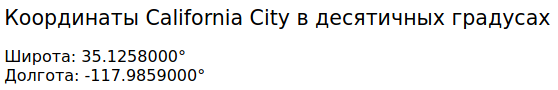

**longitude**

In [149]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0,0
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0,0
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0,0
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0,0
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0,0
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0,0
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0,0
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0,0
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0,0
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0,0


In [150]:
df['longitude_outlier'] = 0
df.loc[df['longitude'] >= 0, 'longitude_outlier'] = 1

In [151]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0,0,1
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0,0,1
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0,0,1
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0,0,1
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0,0,1
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0,0,1
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0,0,1
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0,0,1
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0,0,1
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0,0,1


In [152]:
df.loc[df['longitude'] > 0, 'longitude'] * -1

3479    -118.51
5904    -118.43
8405    -118.36
8636    -118.41
13051   -121.29
15263   -117.27
18551   -122.03
Name: longitude, dtype: float64

In [153]:
df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1

In [154]:
df.loc[df['longitude'] == 0, 'longitude'] = df['longitude'].median()

In [155]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier


**latitude**

In [156]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,0,0,0
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,1,0,0


In [ ]:
df['latitude_outlier'] = 0
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude_outlier'] = 1

In [158]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier


In [157]:
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = df['latitude'].median()

In [ ]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier


**total_rooms**

Найдем выбросы с помощью квантилей. Наблюдения, значения которых больше 97,5% квантиля и которые меньше 2,5% квантиля будем считать выбросами и заменять на медиану.

In [159]:
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [160]:
total_rooms_max_value = np.quantile(df['total_rooms'], q=0.975)
total_rooms_max_value

8069.074999999993

In [161]:
total_rooms_min_value = np.quantile(df['total_rooms'], q=0.025)
total_rooms_min_value

370.975

In [162]:
condition = (df['total_rooms'] > total_rooms_max_value) | (df['total_rooms'] < total_rooms_min_value)

In [164]:
condition

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_rooms, Length: 20640, dtype: bool

In [166]:
df[condition]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59,0,0,0
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61,0,0,0
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73,0,0,0
81,-122.27,37.81,52.0,210.0,56.0,183.0,56.0,1.1667,112500.0,NEAR BAY,81,0,0,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY,82,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,-121.81,38.84,37.0,352.0,65.0,238.0,67.0,2.8542,275000.0,INLAND,20578,0,0,0
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND,20620,0,0,0
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,20625,0,0,0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND,20627,0,0,0


In [167]:
df.loc[condition, 'total_rooms'] 

59         158.0
61         135.0
73          12.0
81         210.0
82         340.0
          ...   
20578      352.0
20620      198.0
20625      102.0
20627      358.0
20629    10035.0
Name: total_rooms, Length: 1032, dtype: float64

In [168]:
df.loc[condition, 'total_rooms'] = df['total_rooms'].median()
df['total_rooms'].describe()

count    20640.000000
mean      2435.698837
std       1358.232607
min        371.000000
25%       1511.000000
50%       2127.000000
75%       3006.000000
max       8069.000000
Name: total_rooms, dtype: float64

### 5. Отбор и построение новых признаков<a class='anchor' id='feature'>

Исключаем признак "id"

In [169]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id', 'housing_median_age_nan',
       'ocean_proximity_nan', 'longitude_outlier'],
      dtype='object')

In [170]:
df.drop(columns='id', inplace=True)

In [171]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'housing_median_age_nan',
       'ocean_proximity_nan', 'longitude_outlier'],
      dtype='object')

**Количественные переменные**

In [172]:
# Доля спален в общем кол-ве комнат
df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

# Сколько человек в среднем живут в одной комнате
df['population_per_room'] = df['population'] / df['total_rooms']

In [173]:
df[['bedroom_share', 'population_per_room']].head()

,bedroom_share,population_per_room
0,14.659091,0.365909
1,15.579659,0.338217
2,12.951602,0.338105
3,18.445840,0.437991
4,17.209588,0.347265


**Категориальные переменные**<a class='anchor' id='category'>

Неколичественные строковые признаки всегда нужно переводить в числовое представление, так как многие модели машинного обучения не способны работать со строками.

Хороший обзор по работе с категориальными признаками можно посмотреть [здесь](https://dyakonov.org/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/)

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

Заменять строковые значения порядковыми числами не всегда хорошая идея

In [ ]:
1 < 2 < 3 < 4 < 5

True

**A) Бинарные (дамми) переменные**<a class='anchor' id='dummy'>

In [ ]:
df['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [ ]:
pd.get_dummies(df['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [174]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,14.659091,0.365909,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,15.579659,0.338217,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,12.951602,0.338105,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,18.445840,0.437991,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,17.209588,0.347265,0,0,0,1,0


**Б) Feature encoding**<a class='anchor' id='feature_encoding'>

Описание категории каким-то числом

In [175]:
df.groupby('ocean_proximity').median()['total_bedrooms']

ocean_proximity
<1H OCEAN     435.0
INLAND        426.0
ISLAND        512.0
NEAR BAY      425.5
NEAR OCEAN    461.0
Name: total_bedrooms, dtype: float64

In [176]:
df_cat = df.groupby('ocean_proximity').median()['total_bedrooms']
df_cat = pd.DataFrame(df_cat)

df_cat

,total_bedrooms
ocean_proximity,
<1H OCEAN,435.0
INLAND,426.0
ISLAND,512.0
NEAR BAY,425.5
NEAR OCEAN,461.0


In [177]:
df_cat = df.groupby('ocean_proximity', as_index=False).median()[['ocean_proximity', 'total_bedrooms']]
df_cat = pd.DataFrame(df_cat)

df_cat

,ocean_proximity,total_bedrooms
0,<1H OCEAN,435.0
1,INLAND,426.0
2,ISLAND,512.0
3,NEAR BAY,425.5
4,NEAR OCEAN,461.0


In [178]:
df_cat.rename(columns={'total_bedrooms': 'median_rooms'}, inplace=True)

df_cat.sort_values(by='median_rooms')

,ocean_proximity,median_rooms
3,NEAR BAY,425.5
1,INLAND,426.0
0,<1H OCEAN,435.0
4,NEAR OCEAN,461.0
2,ISLAND,512.0


In [ ]:
df['total_bedrooms'].median()

435.0

In [ ]:
df = df.merge(df_cat, on=['ocean_proximity'])

df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms_x,median_rooms_y
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,14.659091,0.365909,0,0,0,1,0,425.5,425.5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,15.579659,0.338217,0,0,0,1,0,425.5,425.5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,12.951602,0.338105,0,0,0,1,0,425.5,425.5


**Вещественные переменные**<a class='acnhor' id='numeric_feature'>

Описание методов можно посмотреть [здесь](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c)

[Вебинар про категориальные фичи](https://www.youtube.com/watch?v=xfKui8OR2dc)

**A) Feature discretization** <a class='acnhor' id='feature_discretization'>

[Статья на эту тему](https://towardsdatascience.com/an-introduction-to-discretization-in-data-science-55ef8c9775a2)

**возраст дома (0-100)**

1 категория - новые дома (до 5 лет),<br>2 категория - дома от 5 до 10<br>...


In [ ]:
df['housing_median_age'].describe()

count    20640.000000
mean        28.665746
std         12.355019
min          1.000000
25%         19.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [180]:
def age_to_cat(X):

    X['age_cat'] = 0

    X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1  
    X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
    X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
    X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4

    return X

In [181]:
df = age_to_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,age_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,14.659091,0.365909,0,0,0,1,0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,15.579659,0.338217,0,0,0,1,0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,12.951602,0.338105,0,0,0,1,0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,18.445840,0.437991,0,0,0,1,0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,17.209588,0.347265,0,0,0,1,0,4


**Б) Feature binarization** <a class='anchor' id='feature_binarization'>

[Статья на эту тему](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789808452/1/ch01lvl1sec17/binarization)

только 1 признак

1 - новый дом,<br>0 - старый

In [ ]:
def age_to_binary_cat(X):

    X['age_binary_cat'] = 0
    X.loc[X['housing_median_age'] <= 5, 'age_binary_cat'] = 1  

    return X

In [ ]:
df = age_to_binary_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms_x,median_rooms_y,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,14.659091,0.365909,0,0,0,1,0,425.5,425.5,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,15.579659,0.338217,0,0,0,1,0,425.5,425.5,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,12.951602,0.338105,0,0,0,1,0,425.5,425.5,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,0,18.445840,0.437991,0,0,0,1,0,425.5,425.5,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,0,17.209588,0.347265,0,0,0,1,0,425.5,425.5,4,0


### latitude, longitude:

_Идея №1_

[Источник](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-6-feature-engineering-and-feature-selection-8b94f870706a)

                   

In [ ]:
!pip install reverse_geocoder

     |████████████████████████████████| 2.2 MB 7.4 MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268087 sha256=217da1741821154c21435a2b2b358f01772c944485fe04abb06e2490721d50f3
  Stored in directory: /root/.cache/pip/wheels/34/6e/70/5423639428a2cac8ea7eb467214a4254b549b381f306a9c790
Successfully built reverse-geocoder


In [ ]:
import reverse_geocoder as revgc  

revgc.search((df.iloc[10].latitude, df.iloc[10].longitude))   

Loading formatted geocoded file...


[OrderedDict([('lat', '37.87159'),
              ('lon', '-122.27275'),
              ('name', 'Berkeley'),
              ('admin1', 'California'),
              ('admin2', 'Alameda County'),
              ('cc', 'US')])]

_Идея №2_

- Найти координаты центров городов, достопримечательностей, станций метро, ..
- Считать расстояние до <...>
- Количество <...> в радиусе 3 км
- ...

### Обобщение
* Генерация новых признаков
    1. Категориальные признаки
        * pd.get_dummies
        * Feature Encoding
    2. Вещественные признаки
        * Feature discretization
        * Feature binarization
        * nWOE, WOE
    3. Основываясь на логике задачи
    4. Автоматическая генерация фичей (к примеру, библиотека feature tools)

### 6. Сохранение результатов<a class='anchor' id='save'>

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms_x,median_rooms_y,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,14.659091,0.365909,0,0,0,1,0,425.5,425.5,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,15.579659,0.338217,0,0,0,1,0,425.5,425.5,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,12.951602,0.338105,0,0,0,1,0,425.5,425.5,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,0,18.445840,0.437991,0,0,0,1,0,425.5,425.5,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,0,17.209588,0.347265,0,0,0,1,0,425.5,425.5,4,0


In [ ]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

### 7. Подготовка данных в реальном проекте<a class='anchor' id='real'>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.longitude_median = None
        self.latitude_median = None
        
    def fit(self, df):
        """Сохранение статистик"""
        
        # Расчет медиан
        self.medians = df[['population', 'housing_median_age', 'total_bedrooms']].median()
        self.longitude_median = df['longitude'].median()
        self.latitude_median = df['latitude'].median()
        
    def transform(self, df):
        """Трансформация данных"""
        
        # 1. Пропуски
        df[['population', 'housing_median_age', 'total_bedrooms']] =\
            df[['population', 'housing_median_age', 'total_bedrooms']].fillna(self.medians)
        
        
        # 2. Выбросы (outliers)
        df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1
        df.loc[df['longitude'] == 0, 'longitude'] = self.longitude_median
        df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = self.latitude_median
        
        
        # 3. Новые фичи (features)
        
        # Доля спален в общем кол-ве комнат
        df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

        # Сколько человек в среднем живут в одной комнате
        df['population_per_room'] = df['population'] / df['total_rooms']
        
        # 4. Обработка категорий
        df = pd.concat([df, pd.get_dummies(df['ocean_proximity'],prefix='o_p_is_')], axis=1)
        
        return df


In [ ]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'

In [ ]:
df = pd.read_csv(DATASET_PATH)

pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)

df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,bedroom_share,population_per_room,o_p_is__-,o_p_is__<1H OCEAN,o_p_is__INLAND,o_p_is__ISLAND,o_p_is__NEAR BAY,o_p_is__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,15.579659,0.338217,0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,12.951602,0.338105,0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,18.445840,0.437991,0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,17.209588,0.347265,0,0,0,0,1,0


In [ ]:
df.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
id                     0
bedroom_share          0
population_per_room    0
o_p_is__-              0
o_p_is__<1H OCEAN      0
o_p_is__INLAND         0
o_p_is__ISLAND         0
o_p_is__NEAR BAY       0
o_p_is__NEAR OCEAN     0
dtype: int64